In [87]:
import pandas as pd
import numpy as np

df = pd.read_csv('RawDataTest.csv', decimal=',', delimiter=';') ##part of Question1
print('Initial DataFrame shape :', df.shape)

### Modifying Feature
## Feature Engineering
# There's no missing data in columns 'START_DATE', 'START_TIME', 'END_DATE', 'END_TIME', hence no clening required
colToRemove = ['START_DATE', 'START_TIME', 'END_DATE', 'END_TIME']
print('\nColumns whose information will be preserved in new Feature and therefore will be dropped:', colToRemove)
df['TRIP_START'] = df['START_DATE'] + ' ' + df['START_TIME']
df['TRIP_END'] = df['END_DATE'] + ' ' + df['END_TIME']

## Removing columns which are 100% empty
print('\nColumns which are completely empty include :', ['Manifold air pressure', 'AREA_IDS', 'REFERENCE_POINTS'])
colToRemove += ['Manifold air pressure', 'AREA_IDS', 'REFERENCE_POINTS']

print('\nColumn "{}" is containing only "JUNK" value which are {}'.format(',,,,,,,,,,,,,', df[',,,,,,,,,,,,,'].unique()))
colToRemove += [',,,,,,,,,,,,,']

## columns containing UseLess information
print('\nColumn "{}" is containg only missing value(16%) and value = 1(84%) as shown : {}'.format('IN_AREA', df['IN_AREA'].astype(str).unique()))
print('Hence we can drop this column too')
colToRemove += ['IN_AREA']

print('\n\nThese columns being dropped :\n', colToRemove)
df.drop(columns=colToRemove, inplace=True)


## Changing Data types of Features
df['TRIP_ID'] = df['TRIP_ID'].astype('str')
df['RPM'] = df['RPM'].astype('float')
df['DISPLACEMENT'] = df['DISPLACEMENT'].astype('float')
# column 'Time', 'TRIP_START', 'TRIP_END' are time based
df['Time'] = pd.to_datetime(df['Time'],format='%d/%m/%Y %H:%M:%S')
df['TRIP_START'] = pd.to_datetime(df['TRIP_START'],format='%d/%m/%Y %H:%M:%S')
df['TRIP_END'] = pd.to_datetime(df['TRIP_END'],format='%d/%m/%Y %H:%M:%S')


### Filling Missing Values by NaN (Not A Number)
df.fillna(value= np.nan, inplace=True) ##part of Question1

## renaming column
df.rename(columns={'Seconds ': 'Seconds'}, inplace=True) ##part of Question1

print('\nCurrent DataFrame shape :', df.shape)
df.head()

Initial DataFrame shape : (2325, 41)

Columns whose information will be preserved in new Feature and therefore will be dropped: ['START_DATE', 'START_TIME', 'END_DATE', 'END_TIME']

Columns which are completely empty include : ['Manifold air pressure', 'AREA_IDS', 'REFERENCE_POINTS']

Column ",,,,,,,,,,,,," is containing only "JUNK" value which are [',,,,,,' ',,,,,' ',,,,' ',,' nan ',' ',,,']

Column "IN_AREA" is containg only missing value(16%) and value = 1(84%) as shown : ['nan' '1.0']
Hence we can drop this column too


These columns being dropped :
 ['START_DATE', 'START_TIME', 'END_DATE', 'END_TIME', 'Manifold air pressure', 'AREA_IDS', 'REFERENCE_POINTS', ',,,,,,,,,,,,,', 'IN_AREA']

Current DataFrame shape : (2325, 34)


,TRIP_ID,Seconds,Time,Latitude,Longitude,Course,GPS Speed,Altitude GPS,Barometer Pressure,Barometer Altitude,...,Accumulated Consumption (L),Average Consumption (L/100km),Gear shifting,Idle (s/n),Cold Running (s/n),FUEL_TYPE,DISPLACEMENT,CAR_DATE,TRIP_START,TRIP_END
0,190487,1,NaT,NaN,NaN,0,0,0,1008.14,42,...,NaN,NaN,0,0,0,Gasoline,1998.0,12/08/2010,2014-08-24 22:34:29,2014-08-24 22:35:17
1,190487,2,NaT,NaN,NaN,0,0,0,1008.13,42,...,NaN,NaN,0,0,0,Gasoline,1998.0,12/08/2010,2014-08-24 22:34:29,2014-08-24 22:35:17
2,190487,3,NaT,NaN,NaN,0,0,0,1008.13,42,...,NaN,NaN,0,0,0,Gasoline,1998.0,12/08/2010,2014-08-24 22:34:29,2014-08-24 22:35:17
3,190487,4,NaT,NaN,NaN,0,0,0,1008.13,42,...,NaN,NaN,0,0,0,Gasoline,1998.0,12/08/2010,2014-08-24 22:34:29,2014-08-24 22:35:17
4,190487,5,NaT,NaN,NaN,0,0,0,1008.12,42,...,NaN,NaN,0,0,0,Gasoline,1998.0,12/08/2010,2014-08-24 22:34:29,2014-08-24 22:35:17


In [88]:

# definig some functions to perform primary data analysis
def getMissingPct(df):
    '''    '''
    return [ round((df['IsNullSum'][i] / max(df['count']))*100,2) for i in range(len(df)) ]

def genMsg(txt):
    '''    '''
    print('_'*12+'| Number of feature/s which are {} : {} |'.format(*txt)+'_'*12)

def  primaryAnalysis(DF, msg =True):
    ''' Function to perform first qunatitative analysis 
    '''
    df_explore = DF.copy()
    if msg: print('Overall dataset shape :', df_explore.shape)

    ## Creating a dataset that explain feature/s
    temp = pd.DataFrame(df_explore.isnull().sum(), columns = ['IsNullSum'])
    temp['dtypes'] = df_explore.dtypes.tolist()
    temp['IsNaSum'] = df_explore.isna().sum().tolist()
    
    temp_tim = temp.loc[temp['dtypes']=='datetime64[ns]' ,:]
    if (len(temp_tim) > 0):
        df_tim = df_explore.loc[:,temp_tim.index].fillna('Missing-NA')
        if msg: genMsg(['Time based', df_tim.shape[1]])
        temp_tim = temp_tim.join(df_tim.describe().T).fillna('')
        temp_tim['%Missing'] = getMissingPct(temp_tim)
        if msg: display(temp_tim)
    
    ## Analyzing Qualitative Features
    temp_cat = temp.loc[temp['dtypes']=='O' ,:]
    if (len(temp_cat) > 0):
        df_cat = df_explore.loc[:,temp_cat.index].fillna('Missing-NA')
        if msg: genMsg(['Qualitative', df_cat.shape[1]])
        temp_cat = temp_cat.join(df_cat.describe().T).fillna('')
        temp_cat['%Missing'] = getMissingPct(temp_cat)
        if msg: display(temp_cat)

    ## Analyzing Quantitative Features
    temp_num = temp.loc[((temp['dtypes']=='int') | (temp['dtypes']=='float')),:]
    if (len(temp_num) > 0):
        df_num = df_explore.loc[:,temp_num.index]#.fillna('Missing-NA')
        if msg: genMsg(['Quantitative', df_num.shape[1]])
        temp_num = temp_num.join(df_num.describe().T).fillna('')
        temp_num['%Missing'] = getMissingPct(temp_num)
        if msg: display(temp_num)

In [89]:
primaryAnalysis(df)

Overall dataset shape : (2325, 34)
____________| Number of feature/s which are Time based : 3 |____________


,IsNullSum,dtypes,IsNaSum,count,unique,top,freq,first,last,%Missing
Time,386,datetime64[ns],386,2325,1937,Missing-NA,386,,,16.6
TRIP_START,0,datetime64[ns],0,2325,3,2014-08-25 18:20:16,1216,2014-08-24 22:34:29,2014-08-25 18:20:16,0.0
TRIP_END,0,datetime64[ns],0,2325,3,2014-08-25 18:40:32,1216,2014-08-24 22:35:17,2014-08-25 18:40:32,0.0


____________| Number of feature/s which are Qualitative : 3 |____________


,IsNullSum,dtypes,IsNaSum,count,unique,top,freq,%Missing
TRIP_ID,0,object,0,2325,3,190676,1216,0.0
FUEL_TYPE,0,object,0,2325,1,Gasoline,2325,0.0
CAR_DATE,0,object,0,2325,1,12/08/2010,2325,0.0


____________| Number of feature/s which are Quantitative : 28 |____________


,IsNullSum,dtypes,IsNaSum,count,mean,std,min,25%,50%,75%,max,%Missing
Seconds,0,int64,0,2325.0,561.076559,338.883644,1.000000,267.000000,558.000000,848.000000,1216.000000,0.00
Latitude,386,float64,386,1939.0,1.322169,0.014593,1.295695,1.310713,1.328028,1.334097,1.342552,16.60
Longitude,386,float64,386,1939.0,103.867708,0.013813,103.847410,103.855550,103.868620,103.875490,103.898050,16.60
Course,0,int64,0,2325.0,193.135054,116.012169,0.000000,106.000000,178.000000,305.000000,359.000000,0.00
GPS Speed,0,int64,0,2325.0,14.634839,13.789214,0.000000,0.000000,13.000000,27.000000,47.000000,0.00
Altitude GPS,0,int64,0,2325.0,18.371183,12.328665,-164.000000,13.000000,17.000000,27.000000,62.000000,0.00
Barometer Pressure,0,float64,0,2325.0,1005.939768,0.873301,1003.640000,1005.160000,1006.130000,1006.710000,1008.140000,0.00
Barometer Altitude,0,int64,0,2325.0,60.522151,7.302126,42.000000,54.000000,59.000000,67.000000,80.000000,0.00
Speed (km/h),0,float64,0,2325.0,28.478710,24.849462,0.000000,0.000000,27.000000,51.000000,88.000000,0.00
Engine Load,0,float64,0,2325.0,48.014194,20.786892,20.000000,34.000000,43.000000,56.000000,100.000000,0.00


In [94]:
##  Question 1
## There are reason Why 'START_DATE' & 'START_TIME' are not saved seperately and are saved  as feature 'TRIP_START'
colToPreserve = ['TRIP_ID', 'Seconds', 'TRIP_START', 'Speed (km/h)', 'RPM', 'Latitude', 'Longitude']
df[colToPreserve].to_csv('CleanedData.csv', index=False)

clean_df = df[colToPreserve]
##  Question 1 End

List of Variables: 
- TRIP_ID; 
- START_DATE; 
- START_TIME; 
- END_DATE; 
- END_TIME;
- Seconds ; 
- Time; 
- Latitude; 
- Longitude; 
- Course; 
- GPS Speed ; 
- Altitude GPS; 
- Barometer Pressure (kPA); 
- Barometer Altitude (m); 
- Speed (km/h); 
- Engine Load; 
- RPM; 
- Battery State (SOC) (%); 
- Manifold air pressure ; 
- In-take air temperature (deg C); 
- Air mass flow (g/s); 
- Throttle position (%); 
- Coolant temperature (degree C); 
- Acceleration X (m/s2); 
- Acceleration Y (m/s2); 
- Acceleration Z (m/s2); 
- Slope (m/m); 
- Injection Cut (s/n); 
- Instant Consumption (L/100km); 
- Accumulated Consumption (L); 
- Average Consumption (L/100km); 
- Gear shifting; Idle (s/n); 
- Cold Running (s/n); 
- FUEL_TYPE; 
- DISPLACEMENT (cc); 
- CAR_DATE; 
- I N_AREA; 
- AREA_IDS; 
- REFERENCE_POINTS

Total travel time can be computed from the maximum value of the variable Seconds for a given Trip_ID.


Idle time is calculated based on total time for which Speed (km/hr) values are zero and corresponding RPM values are non-zero.

In [168]:
## Question 2
# There are only three unique Trips
# - total travel time, 
# - idle time
# - maximum speed

t1 = pd.DataFrame(clean_df.groupby(by=['TRIP_ID'])['Seconds'].max()).rename(columns={'Seconds': 'Total Travel Time'})
t2 = pd.DataFrame(clean_df.loc[(clean_df['Speed (km/h)']==0)&(clean_df['RPM']!=0), :].groupby(by=['TRIP_ID'])['Seconds'].count()).rename(columns={'Seconds': 'Idle Time'})
t3 = pd.DataFrame(clean_df.groupby(by=['TRIP_ID'])['Speed (km/h)'].max()).rename(columns={'Speed (km/h)': 'Max Speed (km/h)'})
result_df = t1.join(t2).join(t3).reset_index()
result_df

## Question 2 End

,TRIP_ID,Total Travel Time,Idle Time,Max Speed (km/h)
0,190487,48,48,0.0
1,190488,1061,332,74.0
2,190676,1216,248,88.0


TRIP_ID == 190676, is having a maximum speed out of all the three trips

/home/mohit/Documents/MyProject/MyProjectVirEnv/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


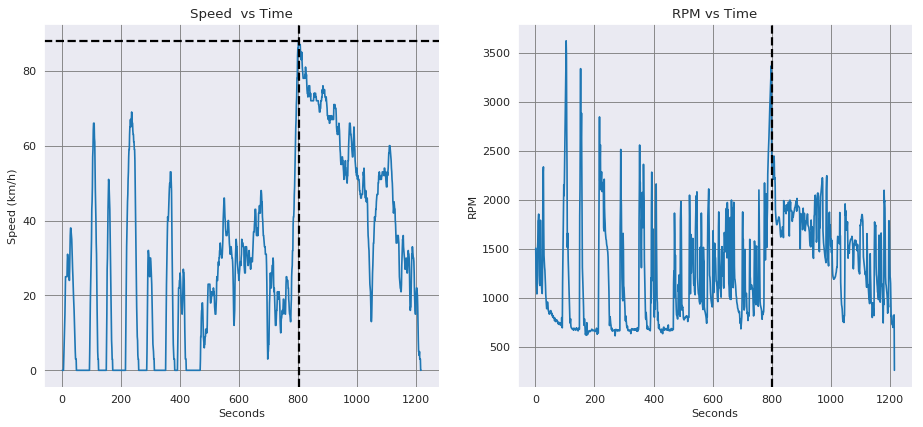

Start Time : 2014-08-25 18:20:16 
Total Travel Time : 1216 seconds


In [165]:
## Question 3
'''
Task 3 – Plotting (25 points)
For TRIP_ID with maximum total travel time (computed as in Task 2 above, create a speed vs. time
plot. The output must include legends with its START_TIME and total travel time.
'''
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark') #  darkgrid, whitegrid, dark, white, ticks

tripId_maxSpeed = list(result_df.loc[result_df['Max Speed (km/h)']==result_df['Max Speed (km/h)'].max(),'TRIP_ID'])[0]
maxSpeed = result_df['Max Speed (km/h)'].max()
timeAtMaxSpeed = clean_df.loc[clean_df['Speed (km/h)']==result_df['Max Speed (km/h)'].max(), 'Seconds'].mean()

plot_DF = clean_df.loc[clean_df['TRIP_ID']==tripId_maxSpeed,:]

plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(1, 2, 1)
plt.title('Speed  vs Time')
sns.lineplot(x=plot_DF['Seconds'], y=plot_DF['Speed (km/h)'])
plt.axhline(y=maxSpeed, color= 'k', ls='dashed', lw=2)
plt.axvline(x=timeAtMaxSpeed, color= 'k', ls='dashed', lw=2)
plt.grid(color='grey')

plt.subplot(1, 2, 2)
plt.title('RPM vs Time')
sns.lineplot(x=plot_DF['Seconds'], y=plot_DF['RPM'])
plt.grid(color='grey')
plt.axvline(x=timeAtMaxSpeed, color= 'k', ls='dashed', lw=2)
plt.subplot(1, 2, 2)

plt.show()

trpStart = list(plot_DF.loc[plot_DF['Seconds']==1, 'TRIP_START'])[0]
totTime = list(result_df.loc[result_df['Max Speed (km/h)']==result_df['Max Speed (km/h)'].max(),'Total Travel Time'])[0]
print('Start Time : {} \nTotal Travel Time : {} seconds'.format(trpStart, totTime))

#  question 3  end

In [ ]:
## Question 4
'''
Task 4– Spatial Plotting (50 bonus points)
The raw data you just cleaned also contain GPS coordinates (latitude and latitude). For the same
TRIP_ID as computed in Task 3, plot the car’s route on a map (NOT via maps.google.com!!).
'''

